In [2]:
# importing the essential packages
import array
import numpy as np
import json
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from keras import backend as K
from re import X

In [3]:
# to retirve and manipulate files which are stored in the google drive
from google.colab import drive
drive.mount('/content/drive')

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

Mounted at /content/drive


In [4]:
# Reading the given csv file as Data Frame
df = pd.read_csv("drive/My Drive/Stout/loans_full_schema.csv")

In [ ]:
# Viewing the Data Frame's first 10 rows
df.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


In [ ]:
# Seeing the count of values for each unique entry in the Data Frame
df.value_counts()

emp_title                     emp_length  state  homeownership  annual_income  verified_income  debt_to_income  annual_income_joint  verification_income_joint  debt_to_income_joint  delinq_2y  months_since_last_delinq  earliest_credit_line  inquiries_last_12m  total_credit_lines  open_credit_lines  total_credit_limit  total_credit_utilized  num_collections_last_12m  num_historical_failed_to_pay  months_since_90d_late  current_accounts_delinq  total_collection_amount_ever  current_installment_accounts  accounts_opened_24m  months_since_last_credit_inquiry  num_satisfactory_accounts  num_accounts_120d_past_due  num_accounts_30d_past_due  num_active_debit_accounts  total_debit_limit  num_total_cc_accounts  num_open_cc_accounts  num_cc_carrying_balance  num_mort_accounts  account_never_delinq_percent  tax_liens  public_record_bankrupt  loan_purpose        application_type  loan_amount  term  interest_rate  installment  grade  sub_grade  issue_month  loan_status  initial_listing_status  dis

In [5]:
# Viewing the shape of the data frame
df.shape

(10000, 55)

In [ ]:
# Printing the name of the columns of the Data Frame
print(df.columns)

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

In [6]:
# Summarizing the information in the Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [ ]:
# Viewing the numerical statictics for the numerical data  
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [ ]:
# Viewing the categorical statictics for the categorical data 
df.describe(include=["object"])

,emp_title,state,homeownership,verified_income,verification_income_joint,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
count,9167,10000,10000,10000,1455,10000,10000,10000,10000,10000,10000,10000,10000
unique,4741,50,3,3,3,12,2,7,32,3,6,2,2
top,manager,CA,MORTGAGE,Source Verified,Not Verified,debt_consolidation,individual,B,B1,Mar-2018,Current,whole,Cash
freq,218,1330,4789,4116,611,5144,8505,3037,647,3617,9375,8206,9284


In [8]:
# Dividing the df dataframe into x and y
# where x : features for prediction and y : Value (interest rate) to be predicted

x = df.loc[:, df.columns != 'interest_rate']
y = df['interest_rate']

In [9]:
# Splitting the data x in train and validation sets and defining a test set too
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True)

In [10]:
# Viewing the shapes of x_train, x_test, y_train and y_test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 54)
(2000, 54)
(8000,)
(2000,)


# **Data Pre-processing**
The data is pre-processed before feeding it into the predictive models. The following techniques have been used for carrying out the data pre-processing:


1.   **Missing values** are found and taken care of. We find the % of missing values in every column and remove columns which have greater than 75% missing in them. We further fill 'unemployed' in place of missing values in the emp_title column after checking a certain condition. At last, the missing values in the remaining columns are filled with the mode value for the column.
2.   The datatypes of the data are found and the column names are segregated into 'categorical' and 'numerical'. **Normalization** using MinMaxScaler() is performed on the numerical training and test data.
3.   Next, the categoricals are mutated to only keep the entries which are the top 25 of the daframe otherwise they are changed to 'other'.
4.   Label encoding is performed on the training and test data.
5.   Correlation coefficient between the columns are calculated and the highly correlated columns are dropped.




In [ ]:
# Finding missing values by column names and percentage in x_train and x_test sets
train_missing = (x_train.isnull().sum() / len(x_train)).sort_values(ascending = False)
test_missing = (x_test.isnull().sum() / len(x_test)).sort_values(ascending = False)

In [ ]:
# Printing the missing values by percentage in the training set
train_missing

verification_income_joint           0.858500
debt_to_income_joint                0.854500
annual_income_joint                 0.854500
months_since_90d_late               0.770375
months_since_last_delinq            0.568625
months_since_last_credit_inquiry    0.129250
emp_title                           0.082500
emp_length                          0.080750
num_accounts_120d_past_due          0.032250
debt_to_income                      0.002250
num_open_cc_accounts                0.000000
num_mort_accounts                   0.000000
account_never_delinq_percent        0.000000
tax_liens                           0.000000
public_record_bankrupt              0.000000
loan_purpose                        0.000000
application_type                    0.000000
loan_amount                         0.000000
term                                0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
issue_mont

In [ ]:
# Keeping 75% as threshold.
# Only keeping the missing values greater than 75% in the test_missing
train_missing = train_missing.index[train_missing > 0.75]
train_missing

Index(['verification_income_joint', 'debt_to_income_joint',
       'annual_income_joint', 'months_since_90d_late'],
      dtype='object')

In [ ]:
# Keeping 75% as threshold.
# Only keeping the missing values greater than 75% in the test_missing
test_missing = test_missing.index[test_missing > 0.75]
test_missing

Index(['verification_income_joint', 'debt_to_income_joint',
       'annual_income_joint', 'months_since_90d_late'],
      dtype='object')

In [ ]:
# Finding common missing values in missing training and test set
all_missing = list(set(set(train_missing) | set(test_missing)))

In [ ]:
# Printing the common missing values
all_missing

['months_since_90d_late',
 'verification_income_joint',
 'annual_income_joint',
 'debt_to_income_joint']

In [ ]:
# Dropping those common missing values from train and test set
x_train.drop(columns = all_missing, axis=1, inplace=True)
x_test.drop(columns = all_missing, axis=1, inplace=True)

In [ ]:
# Checking if the missing values in emp_title means unemployed ot other
unemployed = ['unemployed', 'none', 'Unemployed', 'other', 'Other']
for item in unemployed:
    if item in df['emp_title']:
        print("Found It at ", item)

In [ ]:
# Handle the missing values induvidually per column for training set
x_train['emp_title'] = x_train['emp_title'].fillna("Unemployed")
mode_cols = ['months_since_last_delinq', 'months_since_last_credit_inquiry', 'num_accounts_120d_past_due', 'emp_length', 'debt_to_income']

for col in mode_cols:
  x_train[col] = x_train[col].fillna(x_train[col].mode()[0])


In [ ]:
# Handle the missing values induvidually per column for test set
x_test['emp_title'] = x_test['emp_title'].fillna("Unemployed")
mode_cols = ['months_since_last_delinq', 'months_since_last_credit_inquiry', 'num_accounts_120d_past_due', 'emp_length', 'debt_to_income']

for col in mode_cols:
  x_test[col] = x_test[col].fillna(x_test[col].mode()[0])


In [ ]:
# Checking is training set contains any missing value; False -> No missing value
any(x_train.isna().any())

False

In [ ]:
# Checking is test set contains any missing value; False -> No missing value
any(x_test.isna().any())

False

In [ ]:
# Viewing the details of x_train
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 5879 to 627
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         8000 non-null   object 
 1   emp_length                        8000 non-null   float64
 2   state                             8000 non-null   object 
 3   homeownership                     8000 non-null   object 
 4   annual_income                     8000 non-null   float64
 5   verified_income                   8000 non-null   object 
 6   debt_to_income                    8000 non-null   float64
 7   delinq_2y                         8000 non-null   int64  
 8   months_since_last_delinq          8000 non-null   float64
 9   earliest_credit_line              8000 non-null   int64  
 10  inquiries_last_12m                8000 non-null   int64  
 11  total_credit_lines                8000 non-null   int64  
 12  open

In [ ]:
# Segregating data into data types for further pre-processing
categorical = x_train.select_dtypes(include=['object']).columns.tolist()
numerical = x_train.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
# Viewing the items of categorical data type
categorical

['emp_title',
 'state',
 'homeownership',
 'verified_income',
 'loan_purpose',
 'application_type',
 'grade',
 'sub_grade',
 'issue_month',
 'loan_status',
 'initial_listing_status',
 'disbursement_method']

In [ ]:
# Viewing the items of numerical data type
numerical

['emp_length',
 'annual_income',
 'debt_to_income',
 'delinq_2y',
 'months_since_last_delinq',
 'earliest_credit_line',
 'inquiries_last_12m',
 'total_credit_lines',
 'open_credit_lines',
 'total_credit_limit',
 'total_credit_utilized',
 'num_collections_last_12m',
 'num_historical_failed_to_pay',
 'current_accounts_delinq',
 'total_collection_amount_ever',
 'current_installment_accounts',
 'accounts_opened_24m',
 'months_since_last_credit_inquiry',
 'num_satisfactory_accounts',
 'num_accounts_120d_past_due',
 'num_accounts_30d_past_due',
 'num_active_debit_accounts',
 'total_debit_limit',
 'num_total_cc_accounts',
 'num_open_cc_accounts',
 'num_cc_carrying_balance',
 'num_mort_accounts',
 'account_never_delinq_percent',
 'tax_liens',
 'public_record_bankrupt',
 'loan_amount',
 'term',
 'installment',
 'balance',
 'paid_total',
 'paid_principal',
 'paid_interest',
 'paid_late_fees']

In [ ]:
# Normalization of x train and x test
x_train[numerical] = MinMaxScaler().fit_transform(x_train[numerical])
x_test[numerical] = MinMaxScaler().fit_transform(x_test[numerical])

In [ ]:
# Normalizing the labels 
y_train = MinMaxScaler().fit_transform(np.reshape(y_train.values, (-1,1)))
y_test = MinMaxScaler().fit_transform(np.reshape(y_test.values, (-1,1)))

In [ ]:
# Mutating the categoricals to only keep the entries which are the top 25 of the daframe otherwise they become other
for c in categorical:
  tops = x_train[c].value_counts().index[:25]
  def helper(x):
    if x in tops:
      return x
    else:
      return "Other"

  x_train[c] = x_train[c].apply(helper)
  x_test[c] = x_test[c].apply(helper)

In [ ]:
# Viewing the unique values of x_train 's emp_title 
x_train['emp_title'].value_counts()

Other                 5959
Unemployed             660
manager                171
owner                  168
teacher                163
driver                 101
sales                   84
registered nurse        71
supervisor              65
rn                      57
office manager          49
truck driver            47
general manager         41
president               38
engineer                37
project manager         36
director                34
software engineer       28
operations manager      26
nurse                   26
owner                   25
sales manager           23
analyst                 23
technician              23
accountant              23
machine operator        22
Name: emp_title, dtype: int64

In [ ]:
# Viewing the unique values of x_train 's grade
x_train['grade'].value_counts()

B    2420
C    2120
A    1966
D    1171
E     271
F      43
G       9
Name: grade, dtype: int64

In [ ]:
# Viewing the unique values of x_train 's verified income
x_train['verified_income'].value_counts()

Source Verified    3249
Not Verified       2914
Verified           1837
Name: verified_income, dtype: int64

In [ ]:
# Label encoder
for category in categorical:
  le = LabelEncoder()
  x_train[category] = le.fit_transform(x_train[category])
  x_test[category] = le.transform(x_test[category])

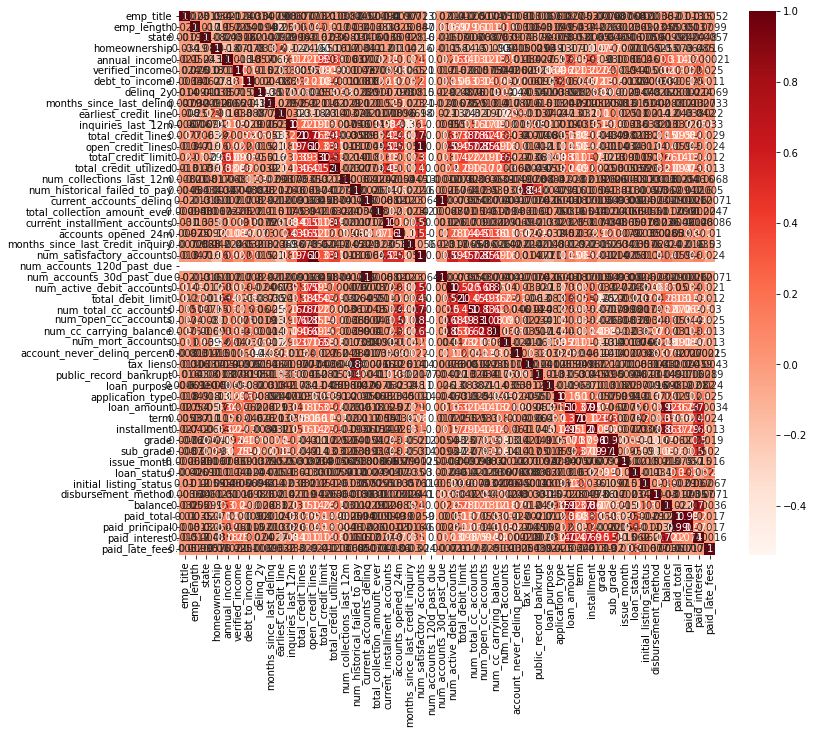

In [ ]:
# Using Pearson's Correlation on training set and visualizing using a heatmap
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# Setting the correlation threshold = 0.9
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = cor.abs()

# Viewing the correlation matrix
corr_matrix.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_title,1.000000,0.023323,0.001925,0.033880,0.021001,0.024125,0.003321,0.014442,0.007853,0.007971,...,0.008650,0.000681,0.004169,0.010473,0.003586,0.031741,0.010462,0.012577,0.014953,0.005165
emp_length,0.023323,1.000000,0.016541,0.194725,0.051729,0.025474,0.040819,0.009411,0.031976,0.251408,...,0.031185,0.002318,0.006927,0.011669,0.034378,0.054960,0.003508,0.001309,0.017472,0.009919
state,0.001925,0.016541,1.000000,0.082450,0.042861,0.001761,0.061546,0.011257,0.000916,0.028771,...,0.006872,0.001614,0.011330,0.005891,0.006123,0.009943,0.023999,0.023802,0.004790,0.005737
homeownership,0.033880,0.194725,0.082450,1.000000,0.176427,0.071447,0.078492,0.032931,0.015851,0.210610,...,0.078467,0.006983,0.010924,0.054836,0.002538,0.153475,0.073383,0.063689,0.085147,0.016489
annual_income,0.021001,0.051729,0.042861,0.176427,1.000000,0.013241,0.177289,0.057064,0.006499,0.155090,...,0.102157,0.008600,0.011192,0.046297,0.010297,0.298721,0.143961,0.122943,0.182410,0.000205


In [ ]:
# Finding the upper bound of correlation value
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_title,NaN,0.023323,0.001925,0.033880,0.021001,0.024125,0.003321,0.014442,0.007853,0.007971,...,0.008650,0.000681,0.004169,0.010473,0.003586,0.031741,0.010462,0.012577,0.014953,0.005165
emp_length,NaN,NaN,0.016541,0.194725,0.051729,0.025474,0.040819,0.009411,0.031976,0.251408,...,0.031185,0.002318,0.006927,0.011669,0.034378,0.054960,0.003508,0.001309,0.017472,0.009919
state,NaN,NaN,NaN,0.082450,0.042861,0.001761,0.061546,0.011257,0.000916,0.028771,...,0.006872,0.001614,0.011330,0.005891,0.006123,0.009943,0.023999,0.023802,0.004790,0.005737
homeownership,NaN,NaN,NaN,NaN,0.176427,0.071447,0.078492,0.032931,0.015851,0.210610,...,0.078467,0.006983,0.010924,0.054836,0.002538,0.153475,0.073383,0.063689,0.085147,0.016489
annual_income,NaN,NaN,NaN,NaN,NaN,0.013241,0.177289,0.057064,0.006499,0.155090,...,0.102157,0.008600,0.011192,0.046297,0.010297,0.298721,0.143961,0.122943,0.182410,0.000205


In [ ]:
# Finding the high correlation value columns 
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 6 columns to remove.


In [ ]:
# Dropping the high correlation value columns from the training and test set
x_train = x_train.drop(columns = to_drop)
x_test = x_test.drop(columns = to_drop)

print('Training shape: ', x_train.shape)
print('Testing shape: ', x_test.shape)

Training shape:  (8000, 44)
Testing shape:  (2000, 44)


In [ ]:
# Predictive Modelling
# Decision Tree

regressor = DecisionTreeRegressor(random_state=0, max_depth = 10)
regressor.fit(x_train, y_train)
y_pred_regressor = regressor.predict(x_train)

# Calculating R2 score of prediction on training data
r2_regressor = r2_score(y_train, y_pred_regressor)
print(r2_regressor)

0.9716962152480468


In [ ]:
# Prediction on test data
y_pred_regressor = regressor.predict(x_test)

# Calculating R2 score of prediction on test data
r2_regressor = r2_score(y_test, y_pred_regressor)
print(r2_regressor)

0.9367742016782508


In [ ]:
# Random Forest
random_forest_regressor = RandomForestRegressor(n_estimators = 50, random_state = 0, verbose = 10)
random_forest_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50
building tree 2 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s


building tree 5 of 50


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s remaining:    0.0s


building tree 6 of 50
building tree 7 of 50


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s


building tree 8 of 50
building tree 9 of 50


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining:    0.0s


building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    9.6s finished


RandomForestRegressor(n_estimators=50, random_state=0, verbose=10)

In [ ]:
# Calculating R2 score of prediction on training data
y_pred_r = random_forest_regressor.predict(x_train)
r2_rf = r2_score(y_train, y_pred_r)
print(r2_rf)

0.9939306090341915


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [ ]:
# Calculating R2 score of prediction on test data
y_pred_test_r = random_forest_regressor.predict(x_test)
r2_rf_test = r2_score(y_test, y_pred_test_r)
print(r2_rf_test)

0.957134965552863


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [ ]:
# Neural network

# Function to calculate R2 score or coeff of determination
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# The model used for predictions
model = keras.Sequential([
                          layers.Dense(32, activation='relu'),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(128, activation='relu'),
                          layers.Dense(512, activation='relu'),
                          layers.Dense(128, activation='relu'),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(32, activation='relu'),
                          layers.Dense(1)
                          ])
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.01), metrics = [coeff_determination])

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    validation_split= 0.2)

Epoch 1/50
200/200 [==============================] - 3s 10ms/step - loss: 0.0795 - coeff_determination: -1.2570 - val_loss: 0.0029 - val_coeff_determination: 0.9204
Epoch 2/50
200/200 [==============================] - 2s 8ms/step - loss: 0.0032 - coeff_determination: 0.9083 - val_loss: 0.0035 - val_coeff_determination: 0.9080
Epoch 3/50
200/200 [==============================] - 2s 8ms/step - loss: 0.0026 - coeff_determination: 0.9240 - val_loss: 0.0028 - val_coeff_determination: 0.9251
Epoch 4/50
200/200 [==============================] - 2s 12ms/step - loss: 0.0027 - coeff_determination: 0.9215 - val_loss: 0.0029 - val_coeff_determination: 0.9212
Epoch 5/50
200/200 [==============================] - 1s 6ms/step - loss: 0.0025 - coeff_determination: 0.9278 - val_loss: 0.0024 - val_coeff_determination: 0.9362
Epoch 6/50
200/200 [==============================] - 1s 6ms/step - loss: 0.0025 - coeff_determination: 0.9276 - val_loss: 0.0020 - val_coeff_determination: 0.9470
Epoch 7/50
20

In [ ]:
# Prediction on training data
train_pred = model.predict(x_train).flatten()
print(train_pred)

[0.32897997 0.07957771 0.19597149 ... 0.04093895 0.32241994 0.1969003 ]


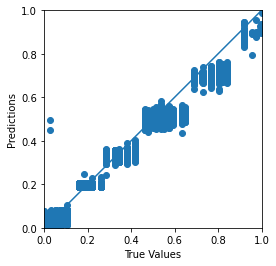

In [ ]:
# Scatter plot for Predictions and True Values of training data
a = plt.axes(aspect='equal')
plt.scatter(y_train, train_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

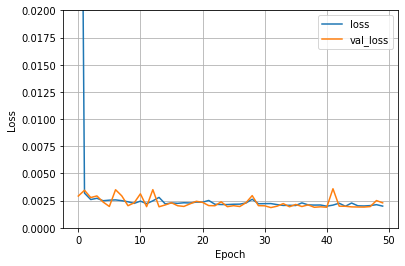

In [ ]:
# Graph for Training Loss vs Validation Loss of training data
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 0.02])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

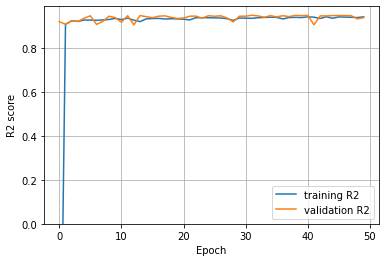

In [ ]:
# Graph for Training coeff of determination vs Validation coeff of determination of training data
plt.plot(history.history['coeff_determination'], label='training R2')
plt.plot(history.history['val_coeff_determination'], label='validation R2')
plt.ylim([0, 0.99])
plt.xlabel('Epoch')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)

In [ ]:
# Predictions on Testing Data
test_pred = model.predict(x_test).flatten()
print(train_pred)

[0.32897997 0.07957771 0.19597149 ... 0.04093895 0.32241994 0.1969003 ]


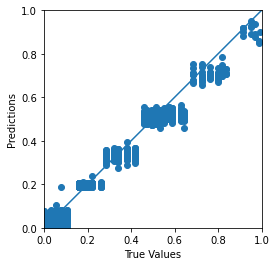

In [ ]:
# Scatter plot for Predictions and True Values of test data
b = plt.axes(aspect='equal')
plt.scatter(y_test, test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
# R2 score for test predictions
r2 = r2_score(y_test, test_pred)
print(r2)

0.9482859531621843


## Further Enhancements

We can utilize grid search algorithm to search for the best hyper parameters for the model, and can also use k-fold cross validation to enhance the models. 
If i had more time, I would have built an ensemble model which used a number regressors as it's base model and then would have calculated the results by both averaging the predictions of all the models and also by max voting technique. Then I would have selected whichever model performed best. I would also evaluate my model more and generate more visualizations to showcase my result. 

PS: I'm extremely thankful to Stout for giving me this opportunity and I have thoroughly enjoyed working on this. I could not work more on this assessment because I have 2 midterms this week.